# Dati da Simultaneous age-dependent and age-independent sexual selection in the lekking black grouse (Lyrurus tetrix)

Sono taggati come open data. scaricabili da https://datadryad.org/resource/doi:10.5061/dryad.2jj6q

In [10]:
import numpy as np
import altair as alt
import pandas as pd
#from IPython.display import display
alt.renderers.enable('notebook')

df = pd.read_excel('./data/data_for_Kervinen_et_al_JAE-2014-00782.R3.xlsx',sheet_name='Data')
print("First five lines of the dataset:")
display(df.head(5))

First five lines of the dataset:


,ID,id,age,year,hatched,age1stlek,lifespan,site,mass,lyre,...,AMS,LMS,S_MS,S_mass,S_lyre,S_blue,S_eyec,S_attend,S_fight,S_dist
0,D154280,M1,1,2002,2001,2,2,A,1160.0,191.0,...,0,1,0.00,-0.831528,-0.733668,-0.848101,-1.464037,-1.108108,NaN,NaN
1,D154280,M1,2,2003,2001,2,2,A,NaN,NaN,...,1,1,0.76,NaN,NaN,NaN,NaN,-0.101523,-0.617284,1.367663
2,D154288,M2,1,2002,2001,2,2,A,1230.0,189.0,...,0,1,0.00,0.140694,-0.834171,-1.797468,-0.862477,-1.459459,NaN,NaN
3,D154288,M2,2,2003,2001,2,2,A,1270.0,222.0,...,1,1,0.76,0.837363,1.023148,1.040724,1.487338,0.609137,-0.987654,1.753045
4,D154299,M3,1,2003,2002,2,3,B,1200.0,170.0,...,0,3,0.00,-0.124176,-1.384259,1.493213,0.022480,-1.421320,NaN,NaN


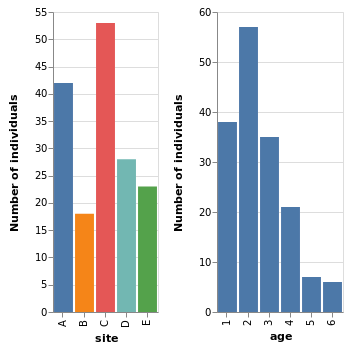

In [11]:
#Visualization of leks (called sites) population and their age ( which should match the number of datapoints for the individual)

interval = alt.selection_single(fields=['site'])
base_chart = alt.Chart(df[['id','age','site']].drop_duplicates('id',keep='last'))
ch = base_chart.mark_bar().encode(
    x = 'site:O',
    y = alt.Y('count()',title='Number of individuals'),
    color = alt.condition(interval,'site', alt.value('lightgray'),legend=None),
    tooltip = 'count()'
).properties(
    selection=interval
)

ch2 = base_chart.mark_bar().encode(
    x = 'age:N',
    y = alt.Y('count()',title='Number of individuals'),
    tooltip = 'count()'
).transform_filter(
    interval
)
ch | ch2

# The histograms below are interactive, you can click on the bars on the left to see just the age histogram of
# that particular site. Hover over a bar to visualize its exact value.

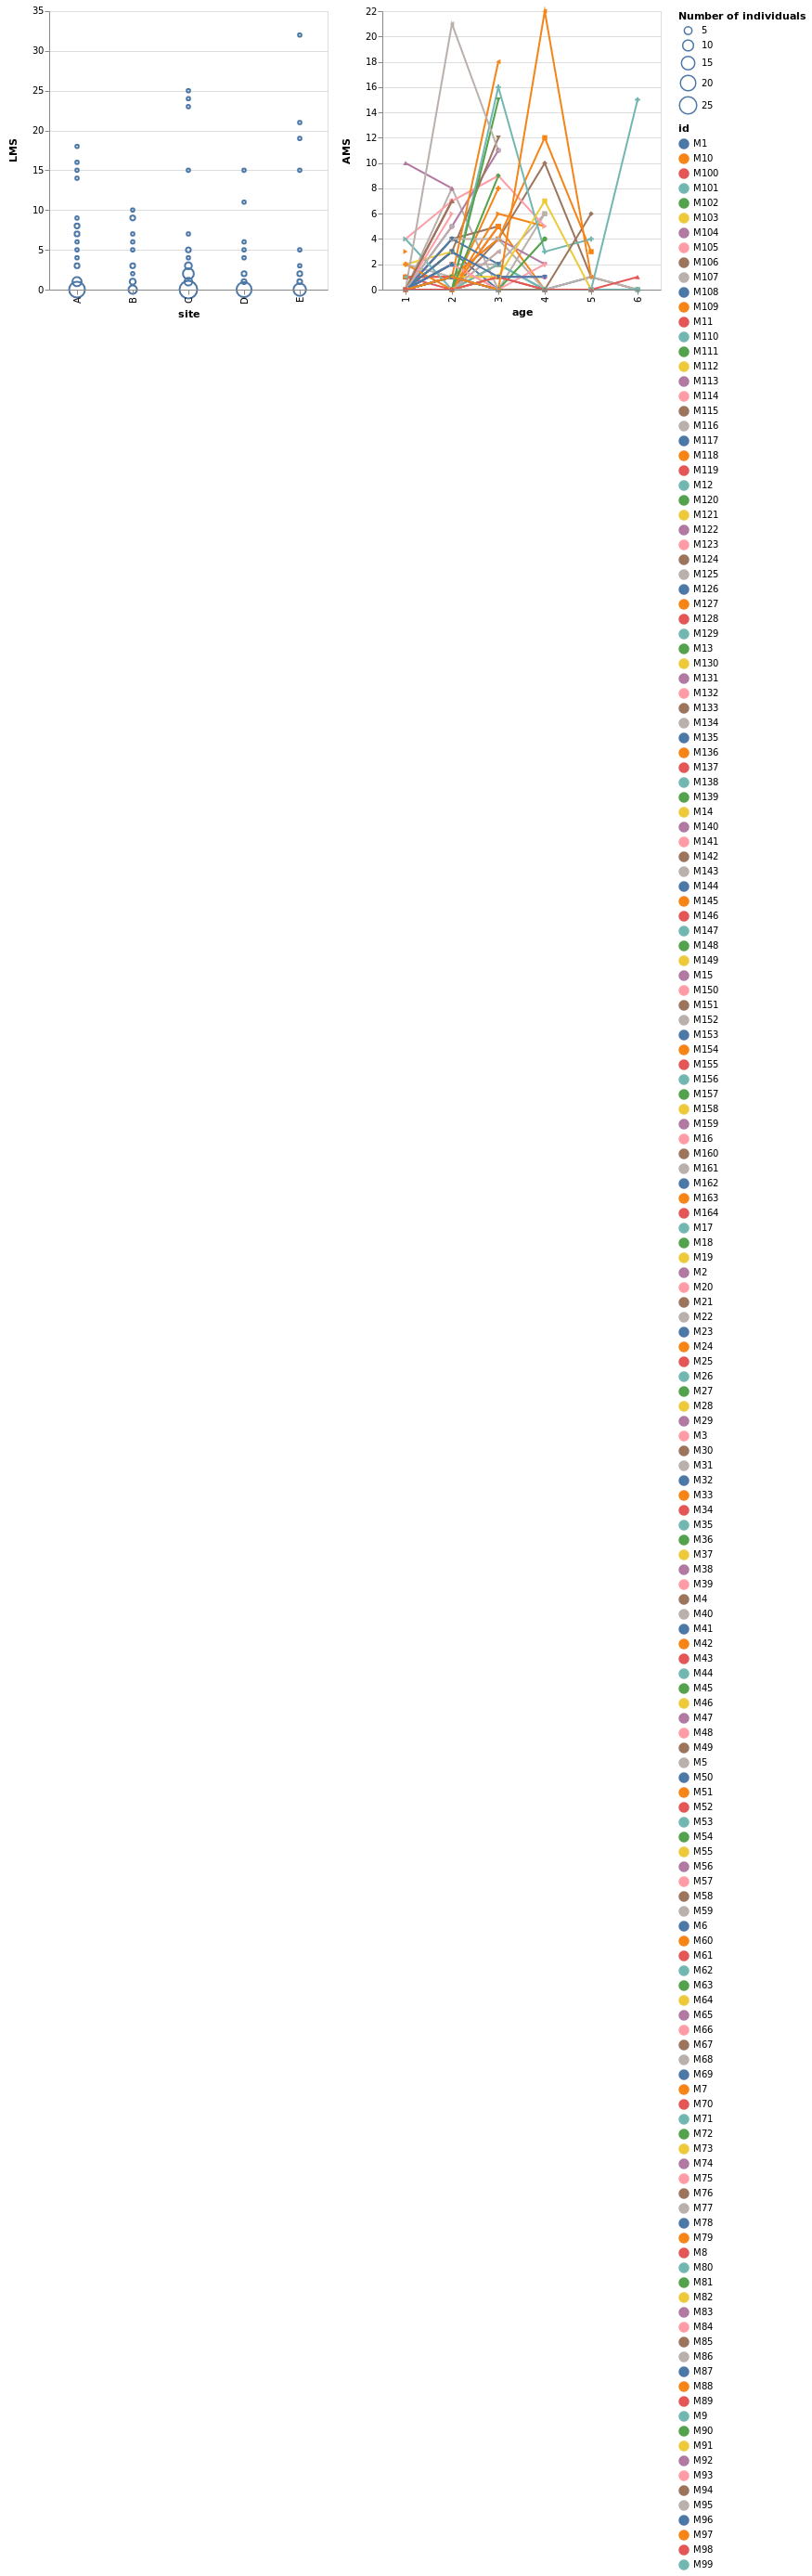

In [17]:
#Visualization of individuals performance divided by lek. 

base = alt.Chart(df[['LMS','AMS','id','site','age']])

lek_sel = alt.selection_interval(encodings=['x','y'])
ch1 = base.mark_point().encode(
    x = 'site',
    y = alt.Y('LMS', type='quantitative'),
    size = alt.Size('distinct(id)',title='Number of individuals'),
    tooltip = alt.Tooltip('distinct(id)')
).properties(
    height = 300,
    width = 300,
    selection = lek_sel
)
ch2 = base.mark_line().encode(
    x = 'age:N',
    y = 'AMS',
    color = 'id',
    shape = alt.Shape('id',legend=None)
).transform_filter(
    lek_sel
).properties(
    height = 300,
    width = 300)
ch1 | ch2

#The plot is interactive. Create a box (by click and drag) on the left plot and drag it around to visualize
#annual performances.

In [13]:
#Visualziation of mean performances vs other traits and age of the first lek.
df_age1stlek = df[['id','AMS','age1stlek','age']]
base =alt.Chart(df_age1stlek)
ch = base.mark_line().encode(
    x = 'age',
    y = alt.Y('mean(AMS)',stack=None),
    tooltip = 'mean(AMS)',
    color = 'age1stlek:N',
    shape = 'age1stlek:N')
bars = base.mark_rule().encode(
    x="age",
    y="ymin:Q",
    y2="ymax:Q",
    color = 'age1stlek:N'
).transform_calculate(
    ymin="mean(df_age1stlek.AMS)- std(df_age1stlek.AMS)",
    ymax="mean(df_age1stlek.AMS)- std(df_age1stlek.AMS)"
)
ch+bars

In [14]:
# Altair useful informations
'''
Per lavorare con selezioni si può usare 
interval = alt.Selection_interval( encodings=\['x'\])


Questo permette di selezionare dati interattivamente da un grafico e poi posso farci all'interno dell'encoding ad esempio

color = alt.condition(interval, 'campo', alt.value('ligthgray'))

ci vuole poi .properties(
    selection= interval)

posso anche fare filtri in funzione della selezione
.transform_filter( 
    interval)
'''
#useful functions of pandas series and dataframes
#pd.value_counts(df['ID']).value_counts(sort=False).reset_index().rename(columns={'index':'years', 'ID':'Number of individuals'})


"\nPer lavorare con selezioni si può usare \ninterval = alt.Selection_interval( encodings=\\['x'\\])\n\n\nQuesto permette di selezionare dati interattivamente da un grafico e poi posso farci all'interno dell'encoding ad esempio\n\ncolor = alt.condition(interval, 'campo', alt.value('ligthgray'))\n\nci vuole poi .properties(\n    selection= interval)\n\nposso anche fare filtri in funzione della selezione\n.transform_filter( \n    interval)\n"

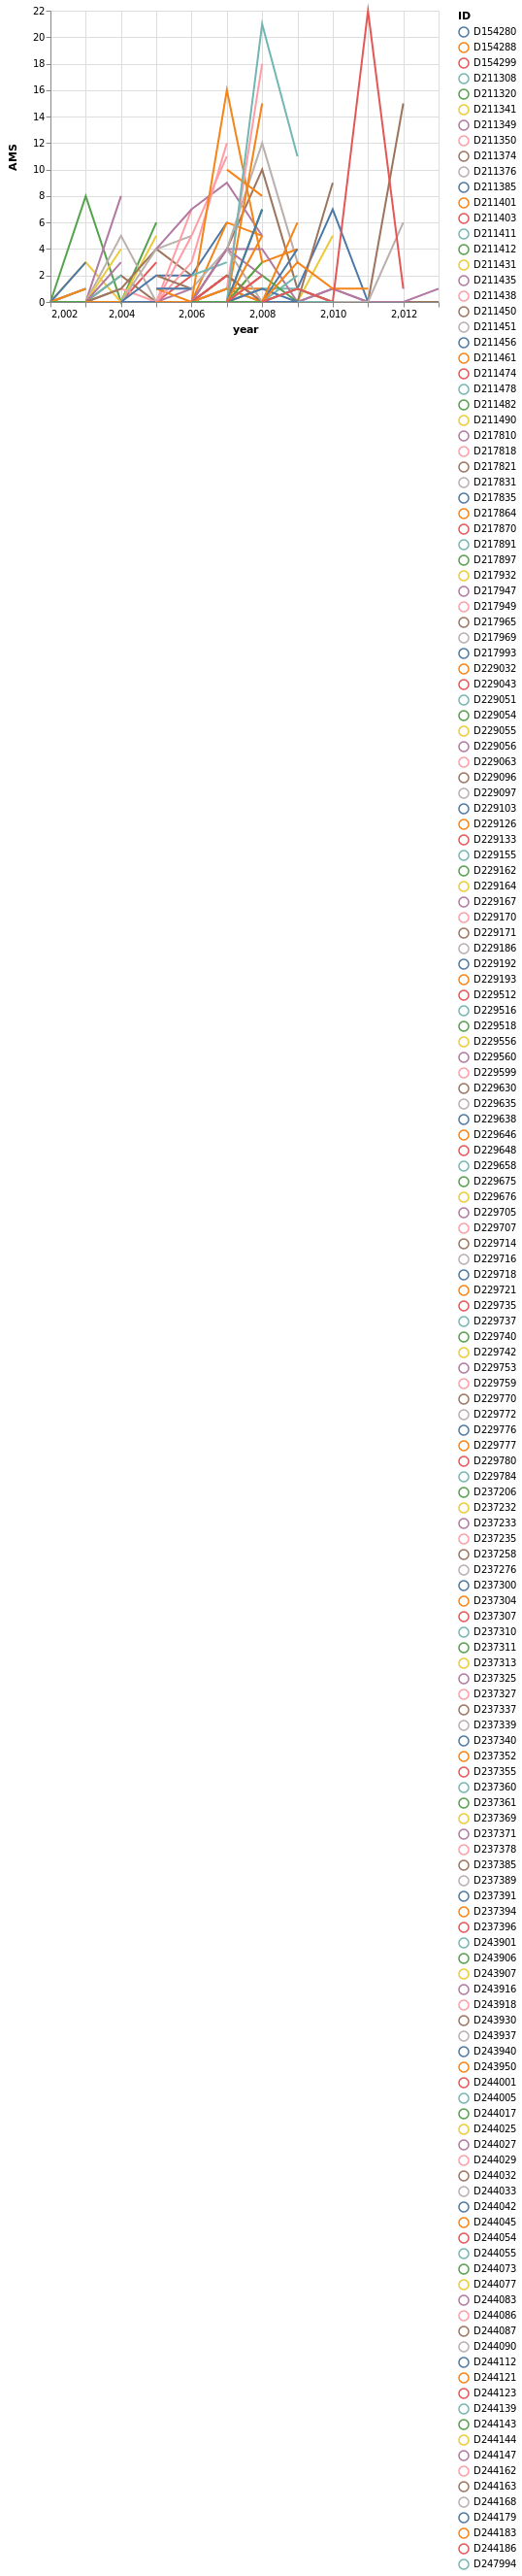

In [15]:

alt.Chart(df[['ID','AMS','year']]).mark_line().encode(
    y = 'AMS',
    x='year',
    color = 'ID')